<a href="https://colab.research.google.com/github/DJ-Manjaray/Sentiment-Analysis-Project-Transformers/blob/main/NLTLK_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the dynamic world of Trading and Finance, a substantial volume of data is generated every day, creating a delicate balance between success and failure in the markets.

The decision to enter or exit multiple trades in the pursuit of profits is often influenced by company reviews. Customer feedback plays a crucial role, shaping the outcome when things go either right or awry. It has been proven that these reviews hold significant sway among traders, leaving a lasting impact.

As a result, traders dedicate considerable efforts to staying abreast of the latest news and taking strategic actions on trades. Recognizing the importance of this endeavor, the automation of such tasks presents promising opportunities for traders, offering them a more efficient and effective approach to navigating the complexities of the market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.special import softmax
plt.style.use('ggplot')



In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [6]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True




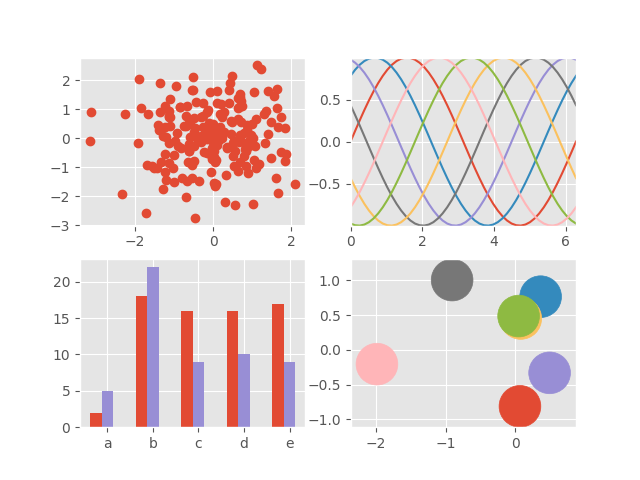

In [8]:
# !unzip "/content/drive/MyDrive/Dataset/Senti_Analysis.zip" -d "/content/drive/MyDrive/Dataset"

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/all_combined.csv')
print(df.shape)

(200000, 4)


In [10]:
df = df.head(500)
print(df.shape)

(500, 4)


In [11]:
df.head()

,reviewId,content,score,app
0,f094f92a-da08-4079-9622-75ddc78e1a09,Facebook is Auto playing videos even when I se...,3,Facebook
1,53e5cfac-e810-472a-88dc-11c034824cfc,Very good,5,Facebook
2,7d840023-cabd-4c5d-ae9d-71236191436d,"""There's a cut on top of the emoji, please fix...",2,Facebook
3,a11c5e79-6f9c-47ad-bf78-7a0fa2d547bf,Excellent,4,Facebook
4,2df53448-8955-49e7-86ff-8b89021a20dc,Muuse cabdi,5,Facebook


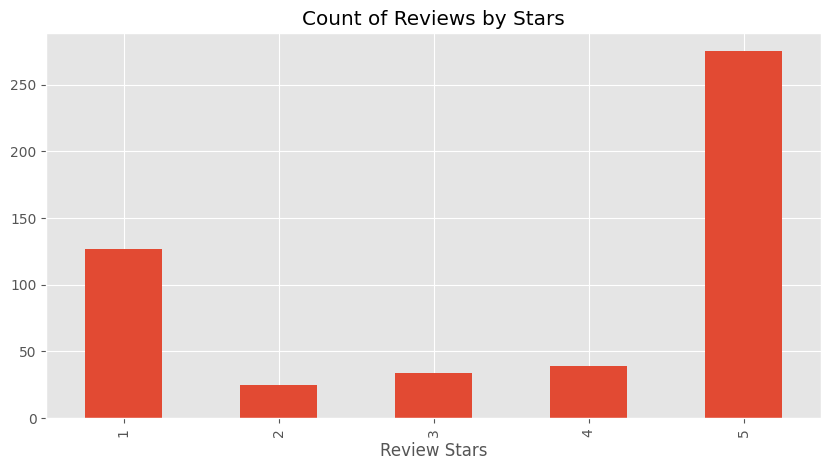

In [12]:
ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [13]:
def remove_emojis(text):
    # Define a regular expression pattern for detecting emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    # Remove emojis using the pattern
    text_without_emojis = emoji_pattern.sub(r'', text)

    return text_without_emojis

In [52]:
df['content'] = df['content'].apply(remove_emojis)
df['content']

0      Facebook is Auto playing videos even when I se...
1                                              Very good
2      "There's a cut on top of the emoji, please fix...
3                                              Excellent
4                                            Muuse cabdi
                             ...                        
495    I mistakenly enter my Facebook email and passw...
496                                             Download
497                                                 Good
498                                                 Good
499                                                 Nice
Name: content, Length: 500, dtype: object

In [57]:
content = df['content'][100]
content

"Halo Facebook my account don't login Facebook name :brennon finch please solve Facebook login keep your account safe problam please solve Facebook"

In [58]:
tokens = nltk.word_tokenize(content)
tokens[:10]

['Halo',
 'Facebook',
 'my',
 'account',
 'do',
 "n't",
 'login',
 'Facebook',
 'name',
 ':']

In [59]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Halo', 'NNP'),
 ('Facebook', 'NNP'),
 ('my', 'PRP$'),
 ('account', 'NN'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('login', 'VB'),
 ('Facebook', 'NNP'),
 ('name', 'NN'),
 (':', ':')]

In [60]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Halo/NNP)
  Facebook/NNP
  my/PRP$
  account/NN
  do/VBP
  n't/RB
  login/VB
  (PERSON Facebook/NNP)
  name/NN
  :/:
  brennon/NN
  finch/JJ
  please/NN
  solve/VB
  (PERSON Facebook/NNP)
  login/JJ
  keep/VB
  your/PRP$
  account/NN
  safe/JJ
  problam/NN
  please/NN
  solve/VB
  (PERSON Facebook/NNP))


# VADER Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in Social Media, Trading, Finance [FinVADER](https://github.com/PetrKorab/FinVADER) etc.




In [19]:
sia = SentimentIntensityAnalyzer()

In [20]:
positive_test = sia.polarity_scores('I am so happy!')
positive_test

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [21]:
negativ_test = sia.polarity_scores('This is the worst thing ever.')
negativ_test

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [61]:
sia.polarity_scores(content)

{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.8442}

In [23]:
# Run the polarity score on the entire dataset
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['content']
    review_Id = row['reviewId']
    res[review_Id] = sia.polarity_scores(review)

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewId'})
vaders = vaders.merge(df, how='left')

In [25]:
# Now we have sentiment score and metadata
vaders.head()

,reviewId,neg,neu,pos,compound,content,score,app
0,f094f92a-da08-4079-9622-75ddc78e1a09,0.102,0.748,0.151,-0.0036,Facebook is Auto playing videos even when I se...,3,Facebook
1,53e5cfac-e810-472a-88dc-11c034824cfc,0.000,0.238,0.762,0.4927,Very good,5,Facebook
2,7d840023-cabd-4c5d-ae9d-71236191436d,0.077,0.474,0.450,0.8494,"""There's a cut on top of the emoji, please fix...",2,Facebook
3,a11c5e79-6f9c-47ad-bf78-7a0fa2d547bf,0.000,0.000,1.000,0.5719,Excellent,4,Facebook
4,2df53448-8955-49e7-86ff-8b89021a20dc,0.000,1.000,0.000,0.0000,Muuse cabdi,5,Facebook


**Plot VADER results**

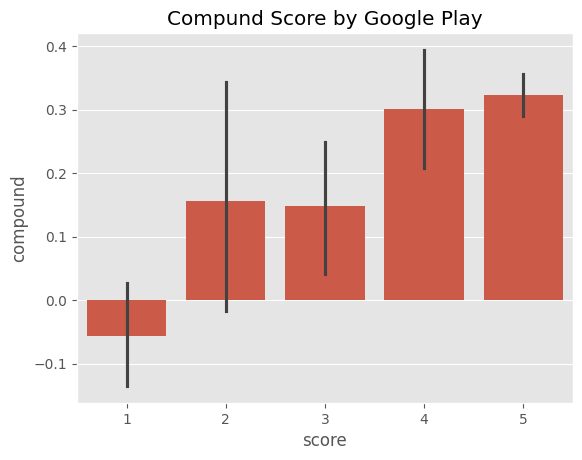

In [26]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compund Score by Google Play')
plt.show()

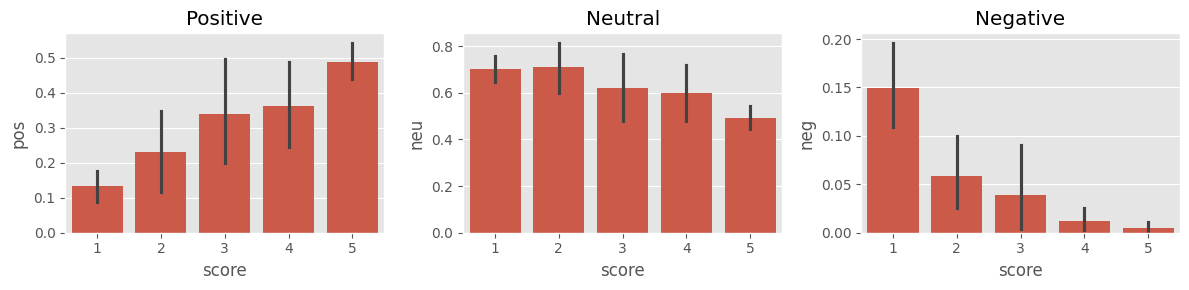

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [62]:
print(content)
sia.polarity_scores(content)

Halo Facebook my account don't login Facebook name :brennon finch please solve Facebook login keep your account safe problam please solve Facebook


{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.8442}

# RoBERTa base model


Pretrained model on English language using a masked language modeling (MLM) objective. It was introduced in this [paper](https://arxiv.org/abs/1907.11692) and first released in this [repository](https://github.com/facebookresearch/fairseq/tree/main/examples/roberta). This model is case-sensitive: it makes a difference between english and English.

**Abstract of the paper:**

Language model pretraining has led to significant performance gains but careful comparison between different approaches is challenging. Training is computationally expensive, often done on private datasets of different sizes, and, as we will show, hyperparameter choices have significant impact on the final results. We present a replication study of BERT pretraining (Devlin et al., 2019) that carefully measures the impact of many key hyperparameters and training data size. We find that BERT was significantly undertrained, and can match or exceed the performance of every model published after it. Our best model achieves state-of-the-art results on GLUE, RACE and SQuAD. These results highlight the importance of previously overlooked design choices, and raise questions about the source of recently reported improvements. We release our models and code.

**Model description**

***RoBERTa*** is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts.

More precisely, it was pretrained with the Masked language modeling (MLM) objective. Taking a sentence, the model randomly masks 15% of the words in the input then run the entire masked sentence through the model and has to predict the masked words. This is different from traditional recurrent neural networks (RNNs) that usually see the words one after the other, or from autoregressive models like GPT which internally mask the future tokens. It allows the model to learn a bidirectional representation of the sentence.

This way, the model learns an inner representation of the English language that can then be used to extract features useful for downstream tasks: if you have a dataset of labeled sentences for instance, you can train a standard classifier using the features produced by the BERT model as inputs.


**Note:** It is primarily aimed at being fine-tuned on tasks that use the whole sentence (potentially masked) to make decisions, such as sequence classification, token classification or question answering. For tasks such as text generation you should look at a model like GPT2.

In [29]:
from transformers import AutoTokenizer, pipeline, AutoConfig, TFAutoModelForSequenceClassification, AutoModelForSequenceClassification

In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT 

In [31]:
sample_sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
sample_sentiment_task("Covid cases are increasing fast!")

[{'label': 'negative', 'score': 0.7235764265060425}]

In [32]:
sample_sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
sample_sentiment_task("All right good")

[{'label': 'positive', 'score': 0.7226990461349487}]

In [63]:
# Run for Roberta Model
encoded_text = tokenizer(content, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.5742371, 'roberta_neu': 0.38979784, 'roberta_pos': 0.03596513}


In [34]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [35]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['content']
        myid = row['reviewId']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 4c7cef24-088b-4c6b-9d0a-ac906eaeff5a


In [65]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'reviewId'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [66]:
results_df.columns

Index(['reviewId', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'content', 'score', 'app'],
      dtype='object')

In [67]:
results_df.head()

,reviewId,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,content,score,app
0,f094f92a-da08-4079-9622-75ddc78e1a09,0.102,0.748,0.151,-0.0036,0.856328,0.133515,0.010157,Facebook is Auto playing videos even when I se...,3,Facebook
1,53e5cfac-e810-472a-88dc-11c034824cfc,0.000,0.238,0.762,0.4927,0.019425,0.095082,0.885492,Very good,5,Facebook
2,7d840023-cabd-4c5d-ae9d-71236191436d,0.077,0.474,0.450,0.8494,0.821056,0.166177,0.012767,"""There's a cut on top of the emoji, please fix...",2,Facebook
3,a11c5e79-6f9c-47ad-bf78-7a0fa2d547bf,0.000,0.000,1.000,0.5719,0.035258,0.148269,0.816473,Excellent,4,Facebook
4,2df53448-8955-49e7-86ff-8b89021a20dc,0.000,1.000,0.000,0.0000,0.106740,0.757699,0.135562,Muuse cabdi,5,Facebook


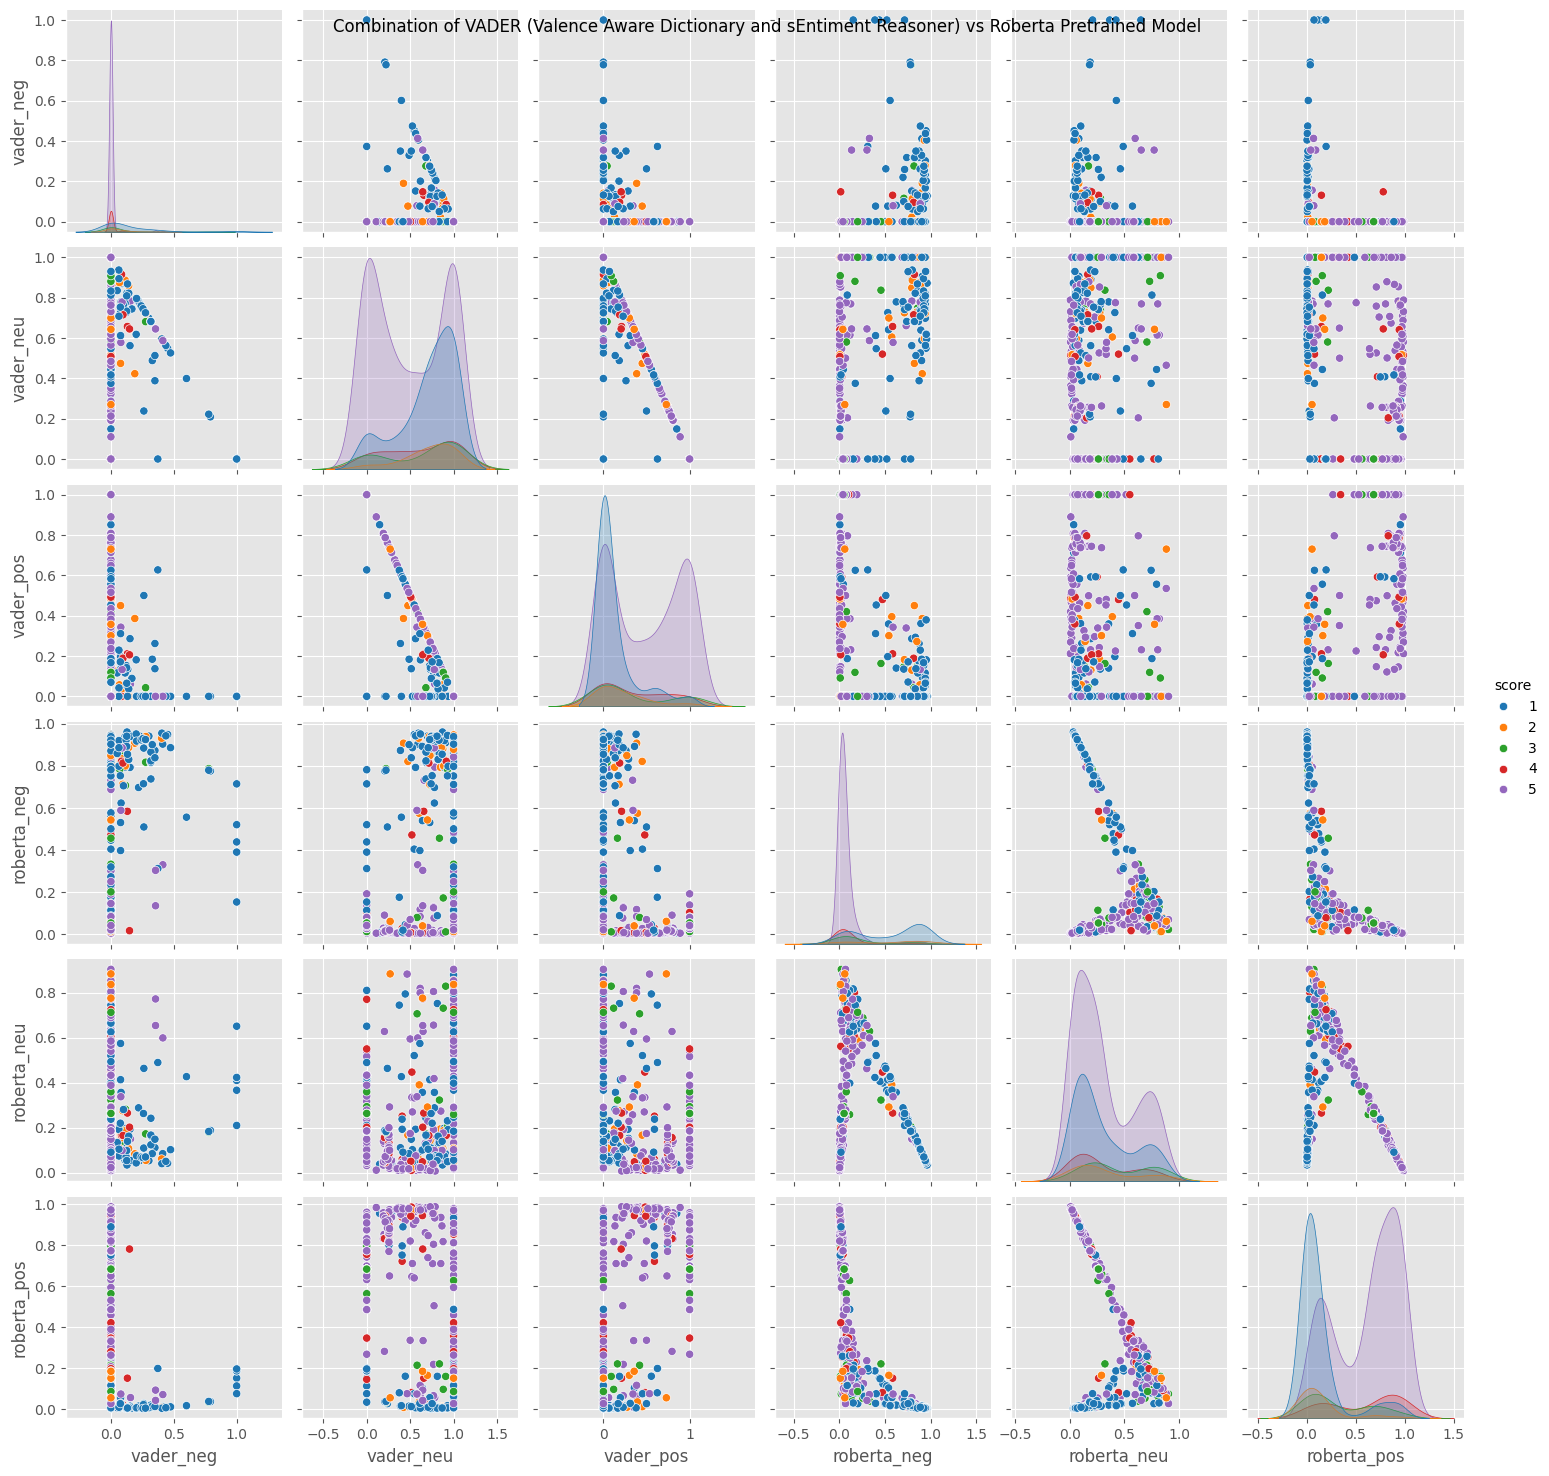

In [39]:
bx = sns.pairplot(data=results_df,
             vars=['vader_neg',
                   'vader_neu',
                   'vader_pos',
                   'roberta_neg',
                   'roberta_neu',
                   'roberta_pos'],
             hue='score',
             palette='tab10')
bx.fig.suptitle('Combination of VADER (Valence Aware Dictionary and sEntiment Reasoner) vs Roberta Pretrained Model')
plt.show()

## Review Examples



*   Positive 1-Star Reviews
*   Negative 5-Star Reviews

Remove

*   transport & map symbols
*   emoticons
*   symbols & pictographs
*   alchemical symbols
*   Geometric Shapes Extended
*   Supplemental Arrows-C
*   Supplemental Symbols and Pictographs
*   Chess Symbols
*   Symbols and Pictographs Extended-A
*   Dingbats

#### Negative sentiment 1-Star

In [68]:
results_df.query('score == 1').sort_values('roberta_pos', ascending=False)['content'].values[0]

'Jogendra  nayak'

In [69]:
results_df.query('score == 1').sort_values('vader_pos', ascending=False)['content'].values[0]

'Good'

#### Positive sentiment 5-Star

In [42]:
results_df.query('score == 5').sort_values('roberta_pos', ascending=False)['content'].values[0]

'Amazing app this app is so amazing, I want to use it forever, this is the coolest app in my life I would always use this app forever I have the account on this app this app is the coolest app in the world'

In [43]:
results_df.query('score == 5').sort_values('vader_pos', ascending=False)['content'].values[0]

'Nice'